In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
import numpy as np 


Read yelp.csv into a DataFrame.

In [15]:
yelp = pd.read_csv('~\Desktop\DAT8\data\yelp.csv')
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


Create a new DataFrame that only contains the 5-star and 1-star reviews.

In [18]:
yelp51 = yelp[(yelp.stars == 1) | (yelp.stars == 5)]

Split the new DataFrame into training and testing sets, using the review text as the only feature and the star rating as the response.

In [22]:
# define X and y

X = yelp51.text
y = yelp51.stars

In [23]:
# train/test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print X_train.shape
print X_test.shape

(3064L,)
(1022L,)


Use CountVectorizer to create document-term matrices from X_train and X_test.
Hint: If you run into a decoding error, instantiate the vectorizer with the argument decode_error='ignore'.

In [26]:
# instantiate the vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [27]:
# learn training data vocabulary, then create document-term matrix
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm

<3064x16825 sparse matrix of type '<type 'numpy.int64'>'
	with 237720 stored elements in Compressed Sparse Row format>

In [28]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1022x16825 sparse matrix of type '<type 'numpy.int64'>'
	with 77006 stored elements in Compressed Sparse Row format>

Use Naive Bayes to predict the star rating for reviews in the testing set, and calculate the accuracy.

In [29]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [30]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [31]:
# calculate accuracy of class predictions
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.918786692759


Calculate the AUC.

Hint 1: Make sure to pass the predicted probabilities to roc_auc_score, not the predicted classes.

Hint 2: roc_auc_score will get confused if y_test contains fives and ones, so you will need to create a new object that contains ones and zeros instead.

In [49]:
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]

In [55]:
y_test_bit = y_test.map({5:1, 1:0})

print metrics.roc_auc_score(y_test_bit, y_pred_prob)

0.940353585141


Plot the ROC curve.

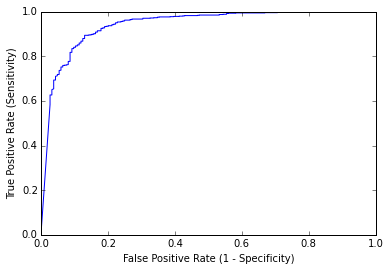

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_test_bit, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

Print the confusion matrix, and calculate the sensitivity and specificity. Comment on the results.

In [57]:
print metrics.confusion_matrix(y_test, y_pred_class)

[[126  58]
 [ 25 813]]


In [68]:
sensitivity = float(126)/(126+25)
sensitivity

0.8344370860927153

In [70]:
specificity = float(813)/(813+58)
specificity

0.9334098737083811

Browse through the review text for some of the false positives and false negatives. Based on your knowledge of how Naive Bayes works, do you have any theories about why the model is incorrectly classifying these reviews?

In [71]:
# print message text for the false positives
X_test[y_test < y_pred_class]

2175    This has to be the worst restaurant in terms o...
1781    If you like the stuck up Scottsdale vibe this ...
2674    I'm sorry to be what seems to be the lone one ...
9984    Went last night to Whore Foods to get basics t...
3392    I found Lisa G's while driving through phoenix...
8283    Don't know where I should start. Grand opening...
2765    Went last week, and ordered a dozen variety. I...
2839    Never Again,\r\nI brought my Mountain Bike in ...
321     My wife and I live around the corner, hadn't e...
1919                                         D-scust-ing.
2490    Lazy Q CLOSED in 2010.  New Owners cleaned up ...
9125    La Grande Orange Grocery has a problem. It can...
9185    For frozen yogurt quality, I give this place a...
436     this another place that i would give no stars ...
2051    Sadly with new owners comes changes on menu.  ...
1721    This is the closest to a New York hipster styl...
3447    If you want a school that cares more about you...
842     Boy is

In [74]:
X_test[2175]    

'This has to be the worst restaurant in terms of hygiene. Two of my friends had food -poisoning after having dinner here. The food is just unhealthy with tons of oil floating on the top of curries, and I am not sure if any health/hygiene code is followed here. \r\nThe service is poor and the information on its website is incorrect, the owner does not allow dine-in after 9 or 10 even though it says that the restaurant is open till 11. \r\n\r\nOne night I saw the owner cleaning the place without gloves and she was nice enough to give us a to-go parcel without cleaning her hands (great example to the servers!). I had a peek inside the kitchen when the door was ajar, and it definitely looked dirty.\r\n\r\nI have been a lot of hole-in-the-wall places around this restaurant, including Haji Baba, the Vietnamese place and others, but neither any of my friends nor I have fallen sick coz of the food. If you need a spicy-food fix, i strongly recommend you do not try this place, lest you want a vi

In [84]:
X_test[1919]

'D-scust-ing.'

Based on a couple samples, It seems that many of these are false positives because they are quite lengthy and can simply be hitting a lot of the positive keywords.  As for the short reviews, they either contain a lot of positively associated words, or are simply unable to be deciphered as normal words.

In [86]:
# print message text for the false negatives
X_test[y_test > y_pred_class]

7148    I now consider myself an Arizonian. If you dri...
4963    This is by far my favourite department store, ...
6318    Since I have ranted recently on poor customer ...
380     This is a must try for any Mani Pedi fan. I us...
5565    I`ve had work done by this shop a few times th...
3448    I was there last week with my sisters and whil...
6050    I went to sears today to check on a layaway th...
2504    I've passed by prestige nails in walmart 100s ...
2475    This place is so great! I am a nanny and had t...
241     I was sad to come back to lai lai's and they n...
3149    I was told to see Greg after a local shop diag...
423     These guys helped me out with my rear windshie...
763     Here's the deal. I said I was done with OT, bu...
8956    I took my computer to RedSeven recently when m...
750     This store has the most pleasant employees of ...
9765    You can't give anything less than 5 stars to a...
6334    I came here today for a manicure and pedicure....
1282    Loved 

In [93]:
X_test[380]

'This is a must try for any Mani Pedi fan. I use to drive to Scottsdale for all of my services until I found this spot. Get the pedi, no metal file pedi once - and you will NEVER go any where else. Have fun. I do..Customer service - top end. Thanks'

I can only guess that false negatives are often because of the use of negative words like "couldn't" and "NEVER" that would associate some of these reviews as negative.  Others were lengthy, so that could have also confused it.

Let's pretend that you want to balance sensitivity and specificity. You can achieve this by changing the threshold for predicting a 5-star review. What threshold approximately balances sensitivity and specificity?

Having a Sensitivity and Specificity around 0.87 for each would probably be where it balances according to the ROC curve

Let's see how well Naive Bayes performs when all reviews are included, rather than just 1-star and 5-star reviews:
Define X and y using the original DataFrame from step 1. (y should contain 5 different classes.)
Split the data into training and testing sets.
Calculate the testing accuracy of a Naive Bayes model.
Compare the testing accuracy with the null accuracy.
Print the confusion matrix.
Comment on the results.

In [102]:
X = yelp.text
y = yelp.stars
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# calculate accuracy of class predictions
print metrics.accuracy_score(y_test, y_pred_class)

0.4712


In [103]:
print metrics.confusion_matrix(y_test, y_pred_class)

[[ 55  14  24  65  27]
 [ 28  16  41 122  27]
 [  5   7  35 281  37]
 [  7   0  16 629 232]
 [  6   4   6 373 443]]


The accuracy of having all 5 stars is significantly worse.  It most likely has to do with the added ambiguity of ratings between 2-4 stars.  This is especially bg with 3 tars being classified as 4.